# 線形回帰

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install seaborn==0.12.2
# !pip install scikit-learn==1.2.2

In [1]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(sklearn.__version__) 

1.5.3
1.22.4
3.7.1
0.12.2
1.2.2


In [3]:
# データ読み込み、外れ値の除外

# データセットの読み込み
df = sns.load_dataset('diamonds')

# 外れ値除外の前処理
df = df.drop(df[(df['x'] == 0) | (df['y'] == 0)| (df['z'] == 0)].index, axis=0)
df = df.drop(df[(df['x'] >= 10) | (df['y'] >= 10) | (df['z'] >= 10)].index, axis=0)
df.reset_index(inplace=True, drop=True)
print(df.shape)
df.head()

(53911, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# 特徴量と目的変数の設定
X = df.drop(['price'], axis=1)
y = df['price']

In [5]:
# one-hot encoding
X = pd.concat([X, pd.get_dummies(X['cut'], prefix='cut', drop_first=True)], axis=1)
X = pd.concat([X, pd.get_dummies(X['color'], prefix='color', drop_first=True)], axis=1)
X = pd.concat([X, pd.get_dummies(X['clarity'], prefix='clarity', drop_first=True)], axis=1)
X = X.drop(['cut', 'color', 'clarity'], axis=1)
print(X.shape)
X.head()

(53911, 23)


,carat,depth,table,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,3.89,3.84,2.31,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [6]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
print('X_trainの形状：', X_train.shape, ' y_trainの形状：', y_train.shape, ' X_testの形状：', X_test.shape, ' y_testの形状：', y_test.shape)

X_trainの形状： (43128, 23)  y_trainの形状： (43128,)  X_testの形状： (10783, 23)  y_testの形状： (10783,)


In [7]:
# 数値の特徴量
X.columns[0:6]

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [8]:
# 特徴量の標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 変換器の作成
num_cols =  X.columns[0:6] # 数値型の特徴量を取得
scaler.fit(X_train[num_cols]) # 学習データでの標準化パラメータの計算
X_train[num_cols] = scaler.transform(X_train[num_cols]) # 学習データの変換
X_test[num_cols] = scaler.transform(X_test[num_cols]) # テストデータの変換

display(X_train.iloc[:2]) # 標準化された学習データの特徴量

,carat,depth,table,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
2640,0.027560,-0.525191,0.690605,0.249983,0.232248,0.175521,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18172,0.853757,0.946774,-0.205316,0.858637,0.908390,1.015857,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
# 学習データの一部を検証データに分割
X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=0)
print('X_trの形状：', X_tr.shape, ' y_trの形状：', y_tr.shape, ' X_vaの形状：', X_va.shape, ' y_vaの形状：', y_va.shape)

X_trの形状： (34502, 23)  y_trの形状： (34502,)  X_vaの形状： (8626, 23)  y_vaの形状： (8626,)


In [10]:
# モデルの学習
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 線形回帰モデル
model.fit(X_tr, y_tr)
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [11]:
# 検証データの予測と評価
y_va_pred = model.predict(X_va) 
print('MAE valid: %.2f' % (mean_absolute_error(y_va, y_va_pred)))

MAE valid: 720.03


In [12]:
# テストデータの予測と評価
y_test_pred = model.predict(X_test) 
print('MAE test: %.2f' % (mean_absolute_error(y_test, y_test_pred)))

MAE test: 733.72


In [13]:
# テストデータの価格の統計情報
y_test.describe()

count    10783.000000
mean      3942.890198
std       4006.435145
min        326.000000
25%        950.500000
50%       2399.000000
75%       5315.500000
max      18797.000000
Name: price, dtype: float64

In [14]:
# テストデータの正解値と予測値の比較
print('正解値：', y_test[:5].values)
print('予測値：', y_test_pred[:5])
print('残差=正解値-予測値：', y_test[:5].values - y_test_pred[:5])

正解値： [3353 2930 4155 2780  684]
予測値： [3844.80018441 3729.41934145 5376.34814181 3775.17294117  201.09376212]
残差=正解値-予測値： [ -491.80018441  -799.41934145 -1221.34814181  -995.17294117
   482.90623788]


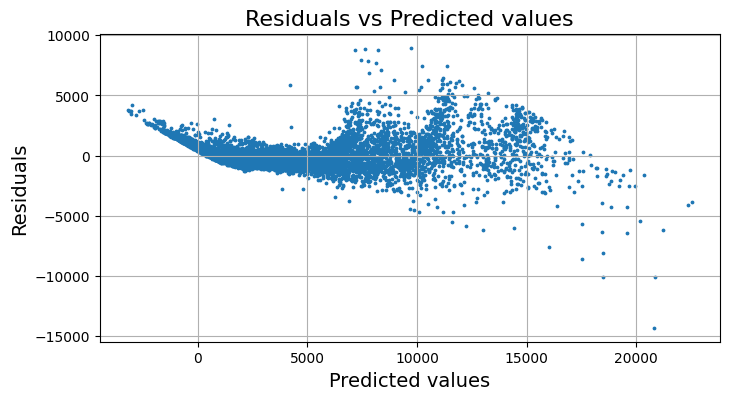

In [15]:
# 残差のプロット

# 残差の計算
residuals = y_test - y_test_pred
# 残差と予測値の散布図
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
plt.scatter(y_test_pred, residuals, s=3)
plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Predicted values', fontsize=16)
plt.grid()
plt.show()

In [16]:
# パラメータ
print('回帰係数 w = [w1, w2, … , w23]:', model.coef_)
print('')
print('定数項 w0:', model.intercept_) 

回帰係数 w = [w1, w2, … , w23]: [ 5494.60292099   114.61886806   -53.56242507 -1657.02211192
  2112.95577393 -1804.48834467   -32.96160085  -134.70130152
  -272.08191419  -719.8799218   -217.42260378  -275.24143348
  -476.34287641  -984.03201496 -1474.24882975 -2376.88122936
  -330.64786069  -368.84301816  -758.44861244 -1037.93424016
 -1648.79355643 -2595.88514062 -5223.64108892]

定数項 w0: 5941.131152323243


In [17]:
# 特徴量の列テキスト表示
X.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Premium',
       'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
       'clarity_SI2', 'clarity_I1'],
      dtype='object')

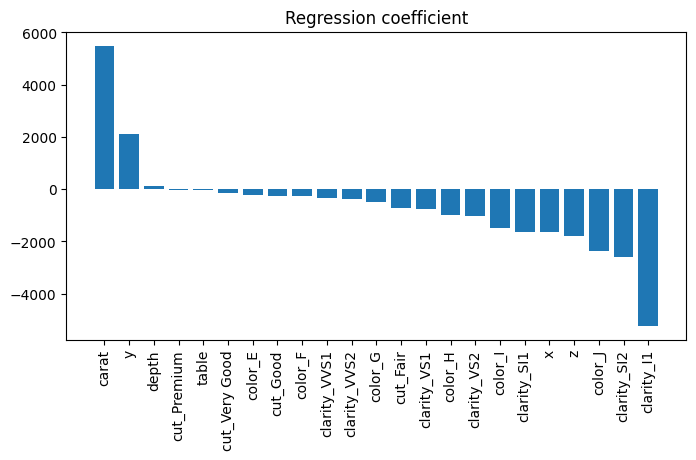

In [18]:
# 回帰係数の可視化
importances = model.coef_ # 回帰係数
indices = np.argsort(importances)[::-1] # 回帰係数を降順にソート

plt.figure(figsize=(8, 4)) #プロットのサイズ指定
plt.title('Regression coefficient') # プロットのタイトルを作成
plt.bar(range(X.shape[1]), importances[indices]) # 棒グラフを追加
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90) # X軸に特徴量の名前を追加
plt.show() # プロットを表示

# Lasso回帰

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.348e+08, tolerance: 5.462e+07
  model = cd_fast.enet_coordinate_descent(


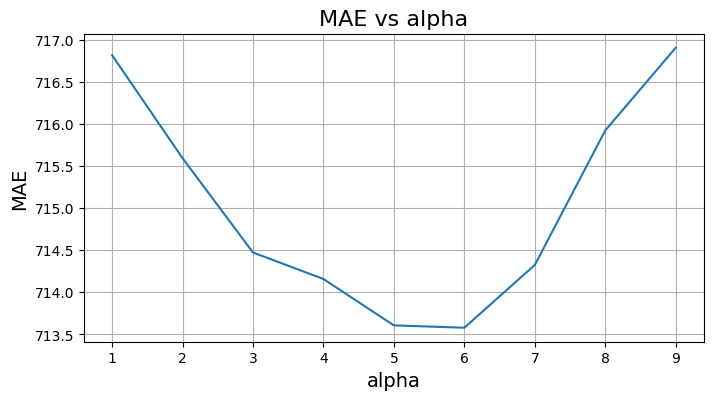

In [19]:
# ハイパーパラメータalphaとMAEの可視化

# ハイパーパラメータalphaとMAEの計算
from sklearn.linear_model import Lasso

params = np.arange(1, 10)
mae_metrics = []

for param in params:
  model_l1 = Lasso(alpha = param)
  model_l1.fit(X_tr, y_tr)
  y_va_pred = model_l1.predict(X_va) 
  mae_metric = mean_absolute_error(y_va, y_va_pred)
  mae_metrics.append(mae_metric)

# ハイパーパラメータalphaとMAEのプロット
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
plt.plot(params, mae_metrics)
plt.xlabel('alpha', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.title('MAE vs alpha', fontsize=16)
plt.grid()
plt.show()  

In [20]:
# モデルの学習
from sklearn.linear_model import Lasso

model_l1 = Lasso(alpha=6.0) # Lasso回帰
model_l1.fit(X_tr, y_tr)
model_l1.get_params()

{'alpha': 6.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [21]:
# 検証データの予測と評価
y_va_pred = model_l1.predict(X_va) 
print('MAE valid: %.2f' % (mean_absolute_error(y_va, y_va_pred)))

MAE valid: 713.58


In [22]:
# テストデータの予測と評価
y_test_pred = model_l1.predict(X_test) 
print('MAE test: %.2f' % (mean_absolute_error(y_test, y_test_pred)))

MAE test: 728.56


In [23]:
# パラメータ
print('回帰係数 w = [w1, w2 , … , w23]:', model_l1.coef_)
print('')
print('定数項 w0:', model_l1.intercept_) 

回帰係数 w = [w1, w2 , … , w23]: [ 5209.5327419    -46.27375066   -99.58406609  -421.9822305
    -0.          -689.75677424    -0.            -0.
  -100.84196665  -539.48155995     0.            -0.
  -170.96297477  -678.86922889 -1124.93361654 -1971.34791688
   135.55629537   133.54045697  -164.80901254  -437.26205901
 -1044.44789869 -1963.84942103 -4255.2198358 ]

定数項 w0: 5053.786238749789


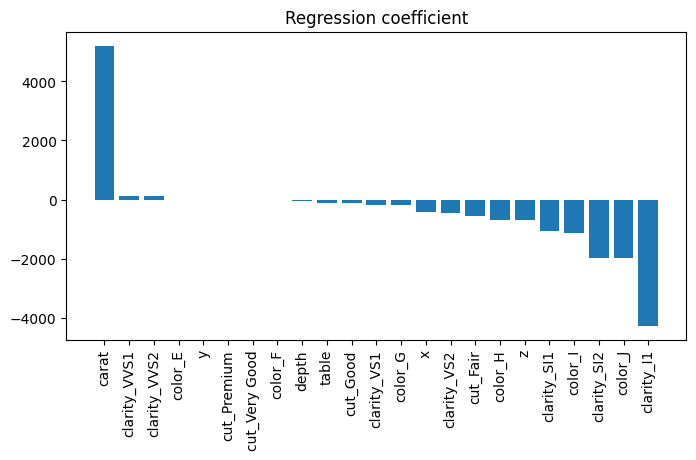

In [24]:
# 回帰係数の可視化
importances = model_l1.coef_ # 回帰係数
indices = np.argsort(importances)[::-1] # 回帰係数を降順にソート

plt.figure(figsize=(8, 4)) #プロットのサイズ指定
plt.title('Regression coefficient') # プロットのタイトルを作成
plt.bar(range(X.shape[1]), importances[indices]) # 棒グラフを追加
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90) # X軸に特徴量の名前を追加
plt.show() # プロットを表示